In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [27]:
def final_model_run(file, show_feat_imp, show_mse, show_graph1, show_graph2, show_graph3):
    model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, max_depth=3, max_features=2,
                                      subsample=0.5, verbose=0, random_state=10)
    features = ['year1_wkts_pm', 'year2_wkts_pm', 'year3_wkts_pm', 'year4_wkts_pm', 'year5_wkts_pm',
                'bowl_home_adv', 'ground_bowl_typ']
    features_nice = ['Year-1 Avg.','Year-2 Avg.','Year-3 Avg.','Year-4 Avg.','Year-5 Avg.',
                    'Home Advantage','Ground Bowl Typ']
    features_arr = np.array(features_nice)
    target = 'wkts'
    
    print('++++++++++ MODEL ++++++++++')
    print(model)
    print('++++++++++ MODEL ++++++++++')
    print('')
    print('++++++++ FEATURES +++++++++')
    print(features)
    print('++++++++ FEATURES +++++++++')
    
    df = pd.read_csv(file)

    test_yr = 2017
    
    print('')

    mask_test = (df.year == test_yr)
    mask_train = (df.year >= test_yr-6) & (df.year <= test_yr-1)
    
    X_train = df[mask_train][features]
    y_train = df[mask_train][target]
    X_test = df[mask_test][features]
    y_test = df[mask_test][target]
    
    model.fit(X_train, y_train)
    
    if (show_feat_imp):
        print('')
        print('Feature Importance:')
        feature_importance = {}
        for label, importance in zip(X_train.columns, model.feature_importances_):
            feature_importance[label] = importance
        print("Sorted Feature Importance:")
        sorted_feature_imp = sorted(feature_importance.items(), key=lambda x: (-x[1]))
        for e in sorted_feature_imp:
            print(e)
        
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        #feature_names = list(X_train.columns[indices])
        feature_names = list(features_arr[indices])
        print (importances[indices])
        plt.figure(figsize=(20,4))
        plt.title("Feature Importances",fontdict={'fontsize':30})
        plt.bar(range(7), importances[indices], color="#334079", align="center")
        # #664079
        plt.xticks(range(7), feature_names,rotation='45',fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlim([-1, 7])
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    df_train = pd.concat([df[mask_train][['player','wkts','year1_wkts_pm']].reset_index(),
                          pd.DataFrame(y_pred_train).reset_index()],axis=1,)
    df_train = df_train.drop('index',axis=1)
    df_train.columns = ['player','wkts','wkts_baseline','wkts_exp']
    df_train_by_player = df_train.groupby('player').sum()
    
    df_test = pd.concat([df[mask_test][['player','wkts','year1_wkts_pm']].reset_index(),
                         pd.DataFrame(y_pred_test).reset_index()],axis=1,)
    df_test = df_test.drop('index',axis=1)
    df_test.columns = ['player','wkts','wkts_baseline','wkts_exp']
    df_test_by_player = df_test.groupby('player').sum()
    
    print(' ')
    print('Explained Variance (Train): ' + str(explained_variance_score(df_train_by_player.wkts,
                                                                        df_train_by_player.wkts_exp)))
    print('Explained Variance (Test): ' + str(explained_variance_score(df_test_by_player.wkts,
                                                                       df_test_by_player.wkts_exp)))
    print('Explained Variance (Test-Baseline): ' + str(explained_variance_score(df_test_by_player.wkts,
                                                                                df_test_by_player.wkts_baseline)))
    print('----')
    
    if (show_mse):
          print('Mean Squared Error (Train): ' + str(mean_squared_error(df_train_by_player.wkts,
                                                                        df_train_by_player.wkts_exp)))
          print('Mean Squared Error (Test): ' + str(mean_squared_error(df_test_by_player.wkts,
                                                                       df_test_by_player.wkts_exp)))
          print('Mean Squared Error (Test-Baseline): ' + str(mean_squared_error(df_test_by_player.wkts,
                                                                                df_test_by_player.wkts_baseline)))
          print('----')
    
    if (show_graph1):
        df_test_by_player.plot(kind='scatter',x='wkts',y='wkts_exp',figsize=(7,5))
        plt.title("Actual vs Expected #Wkts by Player")
        plt.show()
    
    if (show_graph2):
        df_test_by_player[['wkts','wkts_exp']].plot(figsize=(12,5))
        plt.title("Actual and Expected #Wkts by Player")
        plt.show()
    
    if (show_graph3):
        df_test_by_player['residual'] = df_test_by_player.wkts - df_test_by_player.wkts_exp
        df_sorted = df_test_by_player.sort_values(['wkts','residual'])
        df_sorted.plot(kind='scatter',x='wkts',y='residual',figsize=(14,8),c='m')
        plt.title("#Wickets by Player vs Residual", fontdict={'fontsize':24})
        plt.xlabel("Total #wkts captured",fontsize=20)
        plt.ylabel("Residual",fontsize=20)
        plt.show()
    
    print(' ')

++++++++++ MODEL ++++++++++
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=10,
             subsample=0.5, verbose=0, warm_start=False)
++++++++++ MODEL ++++++++++

++++++++ FEATURES +++++++++
['year1_wkts_pm', 'year2_wkts_pm', 'year3_wkts_pm', 'year4_wkts_pm', 'year5_wkts_pm', 'bowl_home_adv', 'ground_bowl_typ']
++++++++ FEATURES +++++++++


Feature Importance:
Sorted Feature Importance:
('ground_bowl_typ', 0.25718058853506531)
('year1_wkts_pm', 0.15346684151621726)
('year2_wkts_pm', 0.152377216837117)
('bowl_home_adv', 0.14166561401983421)
('year3_wkts_pm', 0.12958574018351185)
('year4_wkts_pm', 0.10847297989500645)
('year5_wkts_pm', 0.05725101901

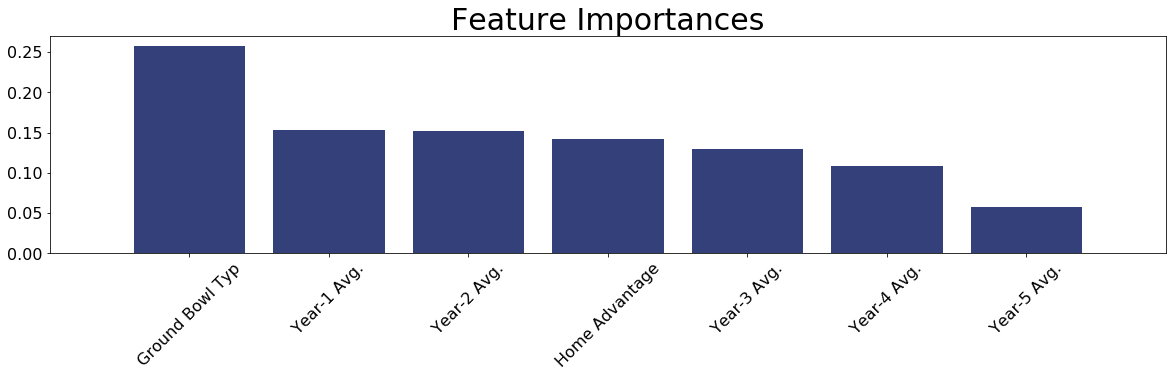

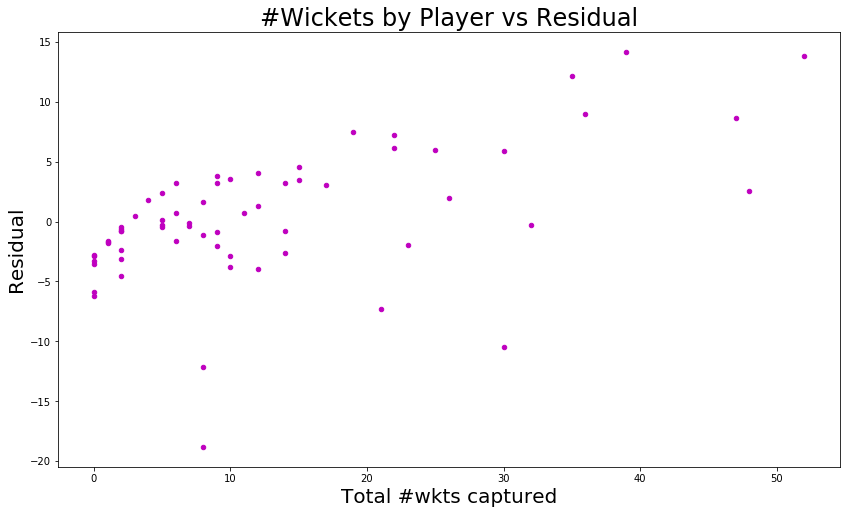

In [28]:
input_file = '../../data/bowling_data_enhanced.csv'

final_model_run(input_file, True, True, False, False, True)